In [1]:
!pip install seaborn --upgrade

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("Seaborn version used is {}".format(sns.__version__))
print("Pandas version used is {}".format(pd.__version__))


     |████████████████████████████████| 283 kB 587 kB/s 
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
ERROR: datalab 1.1.5 has requirement pandas-profiling==1.4.0, but you'll have pandas-profiling 2.4.0 which is incompatible.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
/kaggle/input/ted-talks/ted_main.csv
/kaggle/input/ted-talks/transcripts.csv
Seaborn version used is 0.11.0
Pandas version used is 1.0.1


<h2>1: Quick look at the data</h2>

In [2]:
ted_data = pd.read_csv("/kaggle/input/ted-talks/ted_main.csv")
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


<h2>Available features:</h2>

* <b>comments:</b> Number of comments on the talk.
* <b>description:</b> A quick description of the talk.
* <b>duration:</b> Duration of the talk in seconds.
* <b>event:</b> TED or TEDx, and the year the evnt took place.
* <b>film_date:</b> UNIX timestamp when the talk was filmed.
* <b>lanuages:</b> Number of languages the talk is available in.
* <b>main_speaker:</b> Number of comments on the talk.
* <b>name:</b> Name of the speaker and the title of the talk.
* <b>num_speaker:</b> Number of speakers on the talk.
* <b>published_date:</b> UNIX timestamp when the talk was published on ted.com.
* <b>ratings:</b> A dictionary of ratings like funny, confusing, etc on the talk.
* <b>related_talks:</b> A list of related talks.
* <b>speaker_occupation:</b> Occuation of the speaker.
* <b>tags:</b> Tags assocaited with the talk.
* <b>title:</b> Title of the talk.
* <b>url:</b> URL to the talk.
* <b>views:</b> Number of views for the talk.


In [3]:
display(ted_data.shape)
display(ted_data.describe())
display(ted_data.info())

(2550, 17)

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

None

In [4]:
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

* There are 2550 rows and 17 columns.
* **speaker_occupation** column have 6 missing values.

<h3>Next:</h3>

* Convert the UNIX timestamp to datetime format.
* Convert the duration from seconds to mins.

In [5]:
def date_convert(x):
    return pd.to_datetime(x,unit='s')

ted_data['film_date'] = ted_data['film_date'].apply(date_convert)
ted_data['published_date'] = ted_data['published_date'].apply(date_convert)
ted_data['duration'] = ted_data['duration'].apply(lambda x: round(x/60, 2))
display(ted_data.head())

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


<h2>2: Top 10s</h2>
<h3>Top 10 most talked</h3>

Average duration = 13.78
Median duration = 14.13


,main_speaker,title,event,duration
640,Douglas Adams,"Parrots, the universe and everything",University of California,87.60
588,Randy Pausch,Really achieving your childhood dreams,Carnegie Mellon University,76.45
629,Richard Feynman,Physics is fun to imagine,BBC TV,65.92
2387,Yuval Noah Harari,Nationalism vs. globalism: the new political d...,TED Dialogues,60.13
594,Edwidge Danticat,Stories of Haiti,University of California,59.55
600,Richard Dawkins,Growing up in the universe,Royal Institution,57.92
580,Michael Sandel,What's the right thing to do?,Justice with Michael Sandel,54.93
2421,"Gretchen Carlson, David Brooks",Political common ground in a polarized United ...,TED Dialogues,47.55
947,Malcolm McLaren,Authentic creativity vs. karaoke culture,Handheld Learning,46.02
202,Frank Gehry,My days as a young rebel,TED1990,44.63


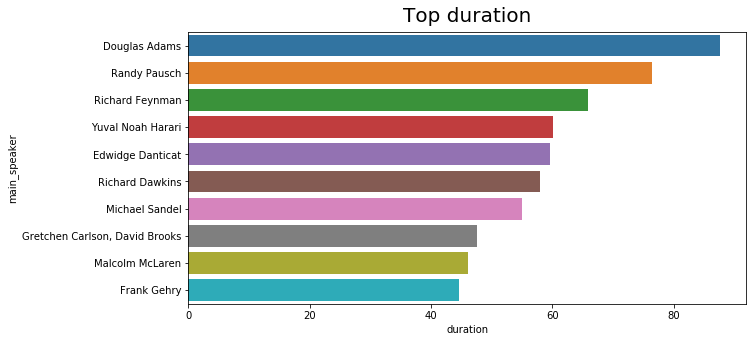

In [6]:
print("Average duration = {}".format(round(ted_data["duration"].mean(), 2)))

print("Median duration = {}".format(round(ted_data["duration"].median(), 2)))

display(ted_data[["main_speaker", "title", "event", "duration"]].sort_values("duration", ascending=False).head(10))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="duration", y="main_speaker", data=ted_data.sort_values('duration', ascending=False)[:10])
ax.set_title("Top duration", pad=10, fontdict={'fontsize': 20})
plt.show()

In [7]:
ted_data[["main_speaker", "title", "event", "duration"]].sort_values("duration").head(10)

,main_speaker,title,event,duration
239,Murray Gell-Mann,The ancestor of language,TED2007,2.25
248,Nellie McKay,"""Clonie""",TED2008,2.33
547,Matthew White,The modern euphonium,TEDGlobal 2009,2.35
454,Yves Behar,A supercharged motorcycle design,TED2009,2.38
264,Marisa Fick-Jordan,The wonder of Zulu wire art,TEDGlobal 2007,2.55
606,Derek Sivers,"Weird, or just different?",TEDIndia 2009,2.70
86,Jill Sobule,"Global warming's theme song, ""Manhattan in Jan...",TED2006,2.72
1390,Paolo Cardini,"Forget multitasking, try monotasking",TEDGlobal 2012,2.87
593,Lalitesh Katragadda,"Making maps to fight disaster, build economies",TEDIndia 2009,2.90
722,Mitchell Joachim,"Don't build your home, grow it!",TED2010,2.93


* Knowing that on an average most TED talks are usually about 18 mins long, __average of 13.7 mins__ and __median of 14.1 mins__ for the entore dataset seems a little lower.
* Having talks that over an hour are uncommon.
* The longest talk comes from __Douglas Adams__ for title named __Parrots, the universe and everything__, timed at about 87 mins. This is actually not a TED talk at all, since it was given at the University of California.
* Infact most of the top duration talks aren't TED talks as seen from the _event_ column. These talks were just hosted on ted.com website.
* The smallest talk came from __Murray Gell-Mann__ for title named __The ancestor of language__, timed at about 2.25 mins.

<h3>Top 10 most viewed</h3>

Average views = 1698297.48
Median views = 1124523.5


,main_speaker,title,event,views
0,Ken Robinson,Do schools kill creativity?,TED2006,47227110
1346,Amy Cuddy,Your body language may shape who you are,TEDGlobal 2012,43155405
677,Simon Sinek,How great leaders inspire action,TEDxPuget Sound,34309432
837,Brené Brown,The power of vulnerability,TEDxHouston,31168150
452,Mary Roach,10 things you didn't know about orgasm,TED2009,22270883
1776,Julian Treasure,How to speak so that people want to listen,TEDGlobal 2013,21594632
201,Jill Bolte Taylor,My stroke of insight,TED2008,21190883
5,Tony Robbins,Why we do what we do,TED2006,20685401
2114,James Veitch,This is what happens when you reply to spam email,TEDGlobal>Geneva,20475972
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",TEDxMidAtlantic,19787465


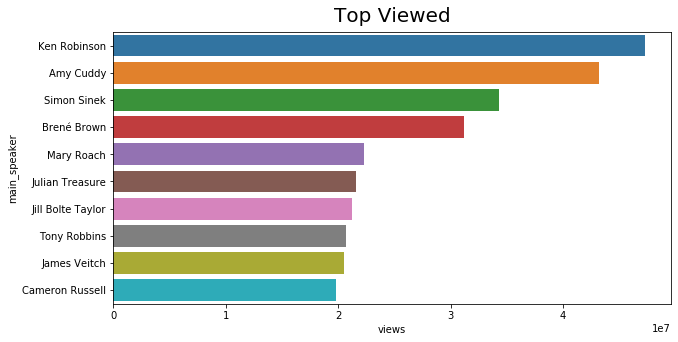

In [8]:
print("Average views = {}".format(round(ted_data["views"].mean(), 2)))

print("Median views = {}".format(round(ted_data["views"].median(), 2)))

display(ted_data[["main_speaker", "title", "event", "views"]].sort_values('views', ascending=False).head(10))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="views", y="main_speaker", data=ted_data.sort_values('views', ascending=False)[:10])
ax.set_title("Top Viewed", pad=10, fontdict={'fontsize': 20})
plt.show()

* The most views came from __Ken Robinson__ for title named "__Do schools kill creativity?__", with almost __47 million__ views, which is huge when compared to average views of about 1.7 million, and a median of about 1.12 million.
* At second place is __Amy Cuddy__'s talk, titled "__Your body language may shape who you are__" with __43 million__ views.
* All of the top viewed talks came from actual TED talks hosted at various TED shows globally.

<h3>Top 10 most comments</h3>

Average comments = 191.56
Median comments = 118.0


,main_speaker,title,event,comments
96,Richard Dawkins,Militant atheism,TED2002,6404
0,Ken Robinson,Do schools kill creativity?,TED2006,4553
644,Sam Harris,Science can answer moral questions,TED2010,3356
201,Jill Bolte Taylor,My stroke of insight,TED2008,2877
1787,David Chalmers,How do you explain consciousness?,TED2014,2673
954,Janet Echelman,Taking imagination seriously,TED2011,2492
840,Lesley Hazleton,On reading the Koran,TEDxRainier,2374
1346,Amy Cuddy,Your body language may shape who you are,TEDGlobal 2012,2290
661,Michael Specter,The danger of science denial,TED2010,2272
677,Simon Sinek,How great leaders inspire action,TEDxPuget Sound,1930


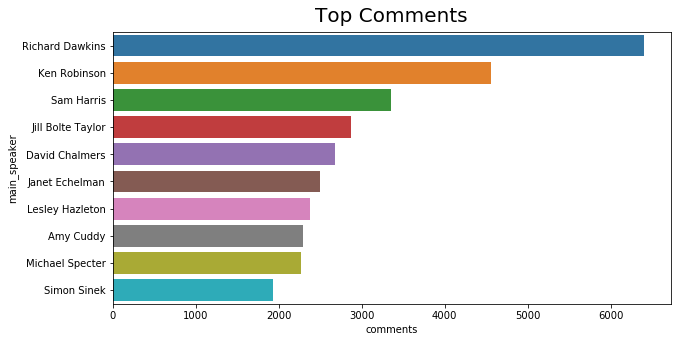

In [9]:
print("Average comments = {}".format(round(ted_data["comments"].mean(), 2)))

print("Median comments = {}".format(round(ted_data["comments"].median(), 2)))

plt.figure(figsize=(10,5))
display(ted_data[["main_speaker", "title", "event", "comments"]].sort_values('comments', ascending=False).head(10))
ax = sns.barplot(x="comments", y="main_speaker", data=ted_data.sort_values('comments', ascending=False)[:10])
ax.set_title("Top Comments", pad=10, fontdict={'fontsize': 20})
plt.show()

* The most commented talk came from __Richard Dawkins__ for the talk titled "__Militant atheism__" hosted at TED in 2002, with 6404 comments, which is big compared to average comments of 191, and median of 118.
* Quite a few of the top viewed talks also seem to have top comments on them, signalling that more views does attract more comments, as expected.
<hr>

Lets see if there is any correlation between views, comments and duration.

,views,comments,duration
views,1.000000,0.530939,0.048754
comments,0.530939,1.000000,0.140712
duration,0.048754,0.140712,1.000000


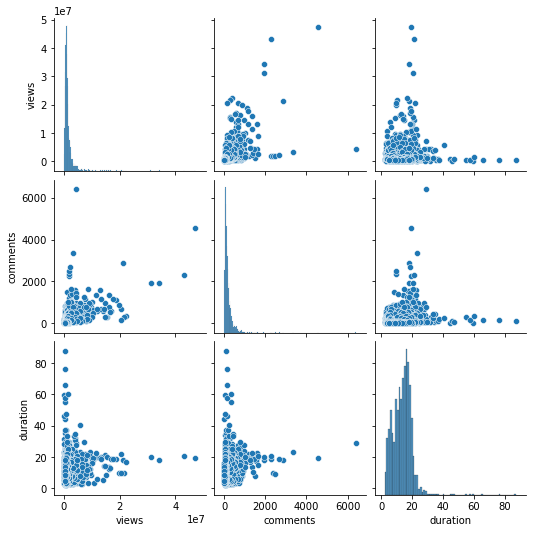

In [10]:
sns.pairplot(data=ted_data, vars=["views", "comments", "duration"])
display(ted_data[["views", "comments", "duration"]].corr())

* From the correlation table and pair plot, we can see that __views and comments have a corr factor of 0.5, suggesting medium to strong correlation__.
* While duration have very weak correlation to views and comments, suggesting longer talks don't seem to gather more attention from the audience.

Lets see which top 10 viewed talks also show up in the top 10 commented.

In [11]:
top_viewed = ted_data[["name", "title", "views"]].sort_values("views", ascending=False).head(10)
top_commented = ted_data[["name", "comments"]].sort_values("comments", ascending=False).head(10)

top_viewed.merge(top_commented, on="name")

,name,title,views,comments
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,47227110,4553
1,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,43155405,2290
2,Simon Sinek: How great leaders inspire action,How great leaders inspire action,34309432,1930
3,Jill Bolte Taylor: My stroke of insight,My stroke of insight,21190883,2877


* As expected, out of top 10 between most viewed and most commented, 4 of them are common.
* The 4 talks came from __Ken Robinson__, __Amy Cuddy__, __Simon Sinek__ and __Jill Bolte Taylor__.

Total no. of speakers = 2544


Writer          0.017689
Artist          0.013365
Designer        0.013365
Journalist      0.012972
Entrepreneur    0.012186
Name: speaker_occupation, dtype: float64

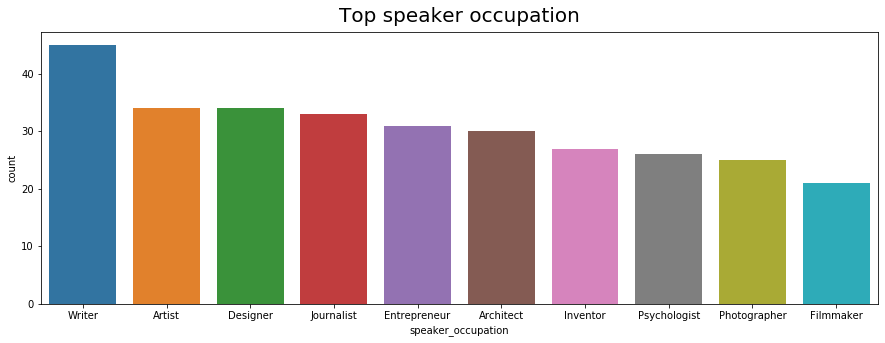

In [12]:
print("Total no. of speakers = {}".format(ted_data["speaker_occupation"].value_counts().sum()))
display(ted_data["speaker_occupation"].value_counts(normalize=True).head())

df = pd.DataFrame(data=ted_data["speaker_occupation"].value_counts().head(10))

df.reset_index(inplace=True)
df.columns = ["speaker_occupation", "count"]

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df, x="speaker_occupation", y="count")
ax.set_title("Top speaker occupation", pad=10, fontdict={'fontsize': 20})
plt.show()

* __Writers__ seem to be most popular occupation of the speakers, followed by __Artist__, __Designer__, __Journalist__ and __Entrepreneur__.
* But still __Writers__ seem to represent only about __1.7% of the total 2544__ total speakers.

<h2>3: Top months and years with most talks</h2>

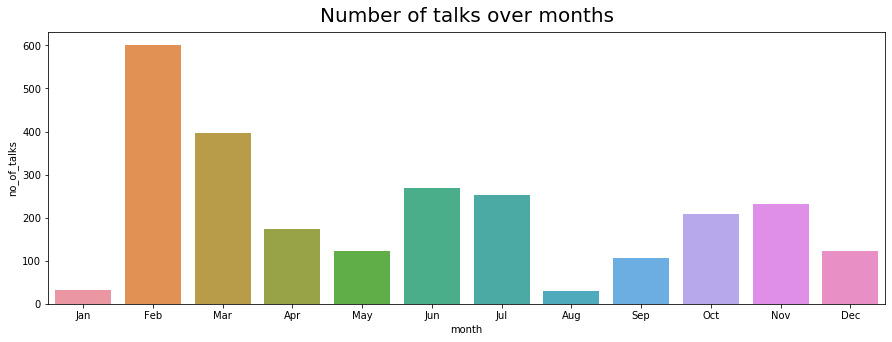

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ted_data['month'] = ted_data['film_date'].apply(lambda x: months[x.month - 1])
ted_data['year'] = ted_data['film_date'].apply(lambda x: x.year)
talk_months = ted_data['month'].value_counts().reset_index()

talk_months.columns = ["month", "no_of_talks"]

plt.figure(figsize=(15,5))
ax = sns.barplot(x="month", y="no_of_talks", data=talk_months, order=months)
ax.set_title("Number of talks over months", pad=10, fontdict={'fontsize': 20})
plt.show()

* Most of the talks seem to happen in the month of February, followed by March.
* January and August seem to be the least popular for talks to be filmed.

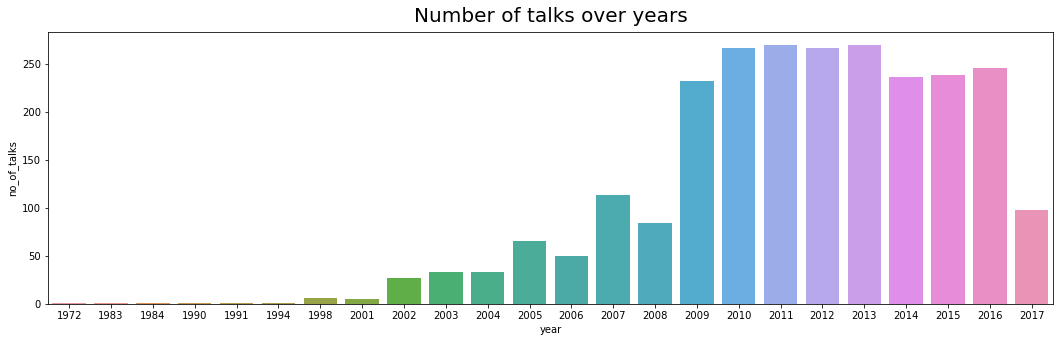

In [14]:
talk_years = ted_data['year'].value_counts().reset_index()

talk_years.columns = ["year", "no_of_talks"]

plt.figure(figsize=(18,5))
ax = sns.barplot(x="year", y="no_of_talks", data=talk_years)
ax.set_title("Number of talks over years", pad=10, fontdict={'fontsize': 20})
plt.show()

* TED talks seem to have increased drmatically from 2008 onwards.

<h2>4: Top ratings</h2>

In [15]:
# print first few values in the ratings column to understand its structure.
for i in ted_data['ratings'][0:2]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")


Value: [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
Type: <class 'str'>


Value: [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name':

* Apparently looks like the __ratings__ columns has list in it, but the data type for it shows to be string.
* So, we first we need to convert this into a list format.

In [16]:
import ast
ted_data["ratings"] = ted_data["ratings"].apply(lambda x: ast.literal_eval(x))

In [17]:
for i in ted_data['ratings'][0:2]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")

Value: [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
Type: <class 'list'>


Value: [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name'

* Now the ratings column is converted to a list.
* Lets create another dataframe for ratings.

In [18]:
ratings_list = []
for x in ted_data["ratings"]:
    d = (pd.json_normalize(x)
    .drop(columns="id")
    .set_index(keys="name")
     .T)
    ratings_list.append(d)

ratings_df = pd.concat(ratings_list)
ratings_df.reset_index(drop=True, inplace=True)
ratings_df.head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


Lets see which are the top Funny, top Confusing and top Inspiring talks.

In [19]:
speaker_ratings_df = pd.concat([ted_data[["main_speaker", "title"]], ratings_df], axis=1)

,main_speaker,title,Funny
0,Ken Robinson,Do schools kill creativity?,19645
2114,James Veitch,This is what happens when you reply to spam email,7731
2161,Tim Urban,Inside the mind of a master procrastinator,7445
1129,Shawn Achor,The happy secret to better work,7315
675,Sebastian Wernicke,"Lies, damned lies and statistics (about TEDTalks)",5552
837,Brené Brown,The power of vulnerability,5225
452,Mary Roach,10 things you didn't know about orgasm,4166
685,Julia Sweeney,"It's time for ""The Talk""",4025
747,Maz Jobrani,Did you hear the one about the Iranian-American?,4013
692,Ken Robinson,Bring on the learning revolution!,3000


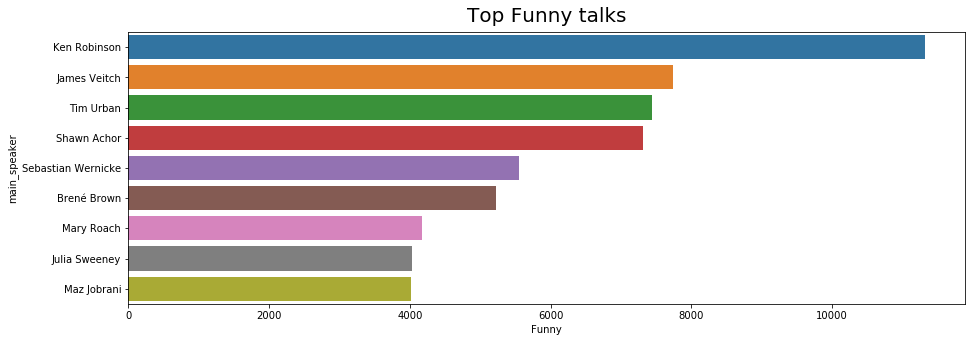

In [20]:
display(speaker_ratings_df[["main_speaker", "title", "Funny"]].sort_values("Funny", ascending=False).head(10))

plt.figure(figsize=(15,5))
ax = sns.barplot(data=speaker_ratings_df.sort_values("Funny", ascending=False).head(10), 
            y="main_speaker", x="Funny", ci=None) # ci=None is needed to remove the error bars
ax.set_title("Top Funny talks", pad=10, fontdict={'fontsize': 20})
plt.show()

* __Ken Robinson__'s talk titled __Do schools kill creativity__ seems to be most funniest talk with more then double votes then the 2nd funniest talk by __James Veitch__'s titled __This .is what happens when you reply to spam email__
* __Ken Robinson__ also had another talk titled __Bring on the learning revolution!__ that shows up in the top 10 most funny talks.

,main_speaker,title,Confusing
494,Elaine Morgan,I believe we evolved from aquatic apes,531
311,Garrett Lisi,An 8-dimensional model of the universe,376
5,Tony Robbins,Why we do what we do,301
201,Jill Bolte Taylor,My stroke of insight,289
208,Clifford Stoll,The call to learn,278
165,Philippe Starck,Design and destiny,276
262,Keith Barry,Brain magic,273
481,Daniel Libeskind,17 words of architectural inspiration,244
0,Ken Robinson,Do schools kill creativity?,242
29,Dan Gilbert,The surprising science of happiness,241


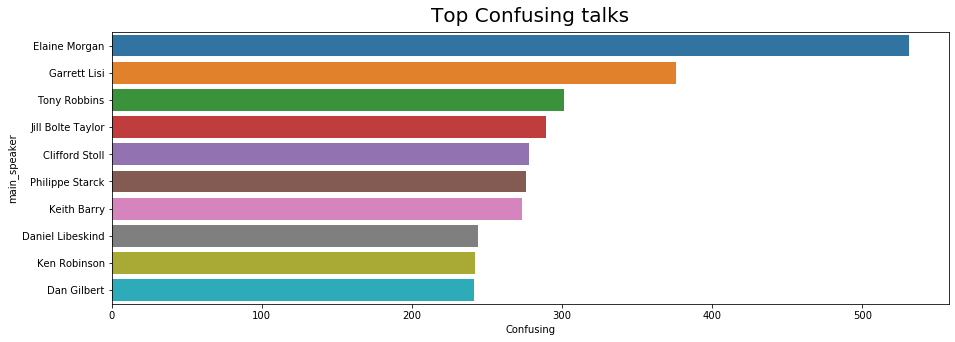

In [21]:
display(speaker_ratings_df[["main_speaker", "title", "Confusing"]].sort_values("Confusing", ascending=False).head(10))

plt.figure(figsize=(15,5))
ax = sns.barplot(data=speaker_ratings_df.sort_values("Confusing", ascending=False).head(10), 
            y="main_speaker", x="Confusing", ci=None) # ci=None is needed to remove the error bars
ax.set_title("Top Confusing talks", pad=10, fontdict={'fontsize': 20})
plt.show()

* Talk titled __I believe we evolved from aquatic apes__ by __Elaine Morgan__ seems to be most confusing for viewers.
* Interestingly, __Ken Robinson__'s talk __Do schools kill creativity__ also is in the top 10 confusing talk, while it was also the most funniest talk.

,main_speaker,title,Inspiring
0,Ken Robinson,Do schools kill creativity?,24924
677,Simon Sinek,How great leaders inspire action,21564
837,Brené Brown,The power of vulnerability,21444
1346,Amy Cuddy,Your body language may shape who you are,21210
1030,Steve Jobs,How to live before you die,17290
201,Jill Bolte Taylor,My stroke of insight,16918
1916,Guy Winch,Why we all need to practice emotional first aid,13398
1129,Shawn Achor,The happy secret to better work,11213
1163,Susan Cain,The power of introverts,10218
530,Chimamanda Ngozi Adichie,The danger of a single story,9566


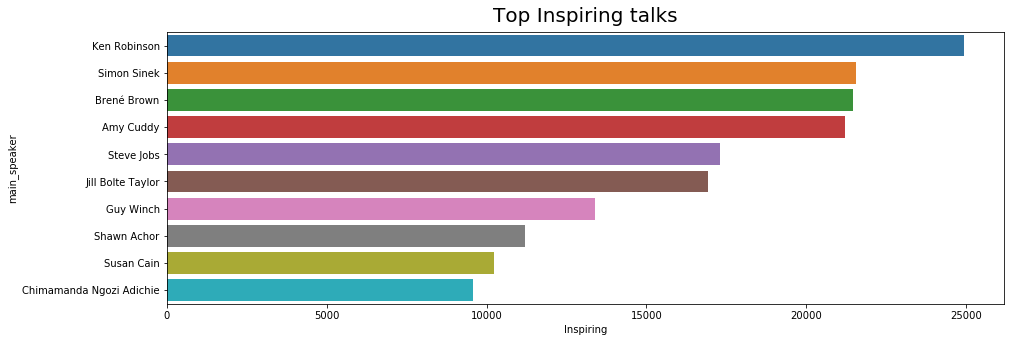

In [22]:
display(speaker_ratings_df[["main_speaker", "title", "Inspiring"]].sort_values("Inspiring", ascending=False).head(10))

plt.figure(figsize=(15,5))
ax = sns.barplot(data=speaker_ratings_df.sort_values("Inspiring", ascending=False).head(10), 
            y="main_speaker", x="Inspiring", ci=None) # ci=None is needed to remove the error bars
ax.set_title("Top Inspiring talks", pad=10, fontdict={'fontsize': 20})
plt.show()

* Once again here __Ken Robinson__'s talk seems to be most inspiring, followed closely by __Simon Sinek__'s talk titled __How great leaders inspire action__.
* __Steve Jobs__'s talk __How to live before you die__ is also amongst the top 10 inspiring talks.

In [23]:
# print first few values in the tags column to understand its structure.
for i in ted_data['tags'][0:2]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")

Value: ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']
Type: <class 'str'>


Value: ['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']
Type: <class 'str'>




* Apparently,tags column has a list but shows up as str type.
* Lets convert it to list type first.

In [24]:
ted_data["tags"] = ted_data["tags"].apply(lambda x: ast.literal_eval(x))

In [25]:
for i in ted_data['tags'][0:2]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")

Value: ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']
Type: <class 'list'>


Value: ['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']
Type: <class 'list'>




technology       0.037956
science          0.029602
global issues    0.026156
culture          0.025373
TEDx             0.023494
design           0.021823
business         0.018169
entertainment    0.015610
health           0.012321
innovation       0.011956
Name: tags, dtype: float64

0.22246006056176254

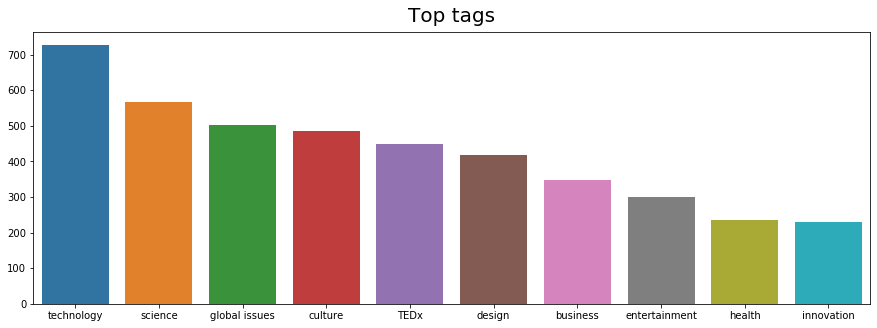

In [26]:
tags = ted_data["tags"].explode().value_counts().head(10)
display(ted_data["tags"].explode().value_counts(normalize=True).head(10))
display(ted_data["tags"].explode().value_counts(normalize=True).head(10).sum())
plt.figure(figsize=(15,5))
ax = sns.barplot(x=tags.index, y=tags.values)
ax.set_title("Top tags", pad=10, fontdict={'fontsize': 20})
plt.show()

* So, most talks seem to be coming __Technology__ category, followed by __Science__, __Global issues__ and __Culture__.
* Still, top 10 tags seem to account for only 22% of the total categories.

* Lot of interesting insights can be derived from ted_data, outside of what is done here.
* TED is a very interesting and informative platform and looking at the way it has evloved over years, it will be exciting to see how it grows in future.
* I will be closing this analysis here. Thanks!
